<a href="https://colab.research.google.com/github/parthnpatel20/drone-sim/blob/main/LAB3EmbeddedAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!unzip -q "/lab-3-building-a-dataset-team4-main.zip"
!ls /content/lab-3-building-a-dataset-team4-main


Circle_Complete  LAB3EmbeddedAI.ipynb  manifest.csv  Triangle_Complete	y.npy
ids.csv		 L_Complete	       README.md     X.npy


In [14]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [15]:
import pandas as pd
import os

base = "/content/lab-3-building-a-dataset-team4-main"

# pick one file from each shape folder
for shape in ["Circle_Complete", "Triangle_Complete", "L_Complete"]:
    folder = os.path.join(base, shape)
    first_file = sorted([f for f in os.listdir(folder) if f.endswith(".csv")])[0]
    path = os.path.join(folder, first_file)
    df = pd.read_csv(path)
    print(f"\n{shape} → {first_file}")
    print(df.columns.tolist())
    print(df.head(3))



Circle_Complete → Accelerometer (1).csv
['time', 'seconds_elapsed', 'z', 'y', 'x']
                  time  seconds_elapsed         z         y         x
0  1760400384956065800         0.167066 -0.193675 -0.062791  0.153968
1  1760400384966019800         0.177020 -0.284358 -0.092526  0.120978
2  1760400384975974100         0.186974 -0.135871 -0.122155  0.078426

Triangle_Complete → Accelerometer (1).csv
['time', 'seconds_elapsed', 'z', 'y', 'x']
                  time  seconds_elapsed         z         y         x
0  1760402719964013300         0.081013  0.011073  0.058958  0.088641
1  1760402719974069200         0.091069 -0.015946  0.070897  0.046003
2  1760402719984126200         0.101126 -0.067913  0.090032  0.016591

L_Complete → Accelerometer (1).csv
['time', 'seconds_elapsed', 'z', 'y', 'x']
                  time  seconds_elapsed         z         y         x
0  1760405901359410000         0.037410  0.000000  0.000000  0.000000
1  1760405901389272800         0.067273 -0.146877 -

In [16]:
import os, re, pandas as pd

BASE = "/content/lab-3-building-a-dataset-team4-main"
SHAPES = ["Circle_Complete","Triangle_Complete","L_Complete"]

# --- numeric sort key for file names like "Accelerometer (12).csv"
def numeric_sort_key(filename):
    m = re.search(r"\((\d+)\)", filename)
    return int(m.group(1)) if m else float('inf')

rows = []
for shape in SHAPES:
    folder = os.path.join(BASE, shape)
    # sort numerically instead of alphabetically
    for name in sorted(os.listdir(folder), key=numeric_sort_key):
        if not name.lower().endswith(".csv"):
            continue
        path = os.path.join(folder, name)
        try:
            df = pd.read_csv(path)
            df = df.dropna(subset=["seconds_elapsed","x","y","z"]).sort_values("seconds_elapsed")
            n = len(df)
            dur = float(df["seconds_elapsed"].iloc[-1] - df["seconds_elapsed"].iloc[0]) if n > 1 else 0.0
            # note: len(rows)+1 keeps global indexing, not per shape (fine for now)
            rows.append({
                "id": f"{shape.split('_')[0].lower()}_{len(rows)+1:03d}",
                "label": shape.split('_')[0].lower(),
                "folder": shape,
                "file": name,
                "path": path,
                "n_samples": n,
                "duration_s": round(dur, 4)
            })
        except Exception as e:
            rows.append({
                "id": None,
                "label": shape.split('_')[0].lower(),
                "folder": shape,
                "file": name,
                "path": path,
                "n_samples": -1,
                "duration_s": None,
                "error": str(e)
            })

manifest = pd.DataFrame(rows)
print("Counts by label:\n", manifest.groupby("label")["file"].count(), "\n")
print("Sample count summary by label:\n", manifest.groupby("label")["n_samples"].describe(), "\n")
manifest.head(10)



Counts by label:
 label
circle      56
l           56
triangle    55
Name: file, dtype: int64 

Sample count summary by label:
           count        mean         std    min    25%    50%     75%    max
label                                                                      
circle     56.0  349.946429  159.578356   -1.0  247.5  305.5  450.00  778.0
l          56.0  270.910714   99.828631  117.0  212.0  249.0  326.75  555.0
triangle   55.0  329.890909  115.753357  142.0  264.5  299.0  407.00  583.0 



,id,label,folder,file,path,n_samples,duration_s,error
0,circle_001,circle,Circle_Complete,Accelerometer (1).csv,/content/lab-3-building-a-dataset-team4-main/C...,483,4.8477,NaN
1,circle_002,circle,Circle_Complete,Accelerometer (2).csv,/content/lab-3-building-a-dataset-team4-main/C...,348,3.5039,NaN
2,circle_003,circle,Circle_Complete,Accelerometer (3).csv,/content/lab-3-building-a-dataset-team4-main/C...,356,3.6134,NaN
3,circle_004,circle,Circle_Complete,Accelerometer (4).csv,/content/lab-3-building-a-dataset-team4-main/C...,354,3.5536,NaN
4,circle_005,circle,Circle_Complete,Accelerometer (5).csv,/content/lab-3-building-a-dataset-team4-main/C...,453,4.5490,NaN
5,circle_006,circle,Circle_Complete,Accelerometer (6).csv,/content/lab-3-building-a-dataset-team4-main/C...,239,2.3989,NaN
6,circle_007,circle,Circle_Complete,Accelerometer (7).csv,/content/lab-3-building-a-dataset-team4-main/C...,357,3.5661,NaN
7,circle_008,circle,Circle_Complete,Accelerometer (8).csv,/content/lab-3-building-a-dataset-team4-main/C...,430,4.2973,NaN
8,circle_009,circle,Circle_Complete,Accelerometer (9).csv,/content/lab-3-building-a-dataset-team4-main/C...,222,2.2137,NaN
9,circle_010,circle,Circle_Complete,Accelerometer (10).csv,/content/lab-3-building-a-dataset-team4-main/C...,582,5.8386,NaN


In [23]:
import os, re, pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# If you already have `manifest` from the previous step, we reuse it here.

# 1) Extract the number in parentheses, e.g., (12) -> 12
m = manifest["file"].str.extract(r"\((\d+)\)")   # DataFrame with one col
manifest["file_num"] = pd.to_numeric(m[0], errors="coerce")  # float with NaN if missing

# 2) Split into valid (numbered) and invalid (unnumbered) files
valid = manifest.dropna(subset=["file_num"]).copy()
invalid = manifest[manifest["file_num"].isna()].copy()

# 3) Make file_num int and sort numerically within each label
valid["file_num"] = valid["file_num"].astype(int)
valid = valid.sort_values(["label","file_num"]).reset_index(drop=True)

# 4) Build shape_id like "circle_002" directly from file_num
valid["shape_id"] = valid.apply(lambda r: f"{r['label']}_{r['file_num']:03d}", axis=1)

# 5) Reorder columns and save ONLY the valid, numbered files
cols = ["shape_id","label","folder","file","file_num","path","n_samples","duration_s","error"]
valid = valid[cols]

os.makedirs("/content/processed", exist_ok=True)
manifest_path = "/content/processed/manifest.csv"
valid.to_csv(manifest_path, index=False)

print(f"Saved manifest with {len(valid)} rows to:", manifest_path)
if len(invalid):
    print("\nNote: skipped files with no numeric suffix in name:")
    display(invalid[["label","file"]].head(min(10, len(invalid))))


Saved manifest with 165 rows to: /content/processed/manifest.csv


In [18]:
import os, pandas as pd, numpy as np
from pandas.errors import EmptyDataError, ParserError

PROC = "/content/processed"
manifest = pd.read_csv(f"{PROC}/manifest.csv")

STEPS = 256
labels = sorted(manifest["label"].unique())
label2id = {lab:i for i,lab in enumerate(labels)}
required = {"seconds_elapsed","x","y","z"}

def load_csv_safe(path):
    """Load a CSV, return DataFrame or None if empty/bad."""
    try_order = [
        dict(),  # default fast path
        dict(engine="python"),  # fallback parser
    ]
    for kwargs in try_order:
        try:
            df = pd.read_csv(path, **kwargs)
            # valid if it has the needed columns and at least 2 rows
            if df is not None and required.issubset({c.lower() for c in df.columns.str.lower()}):
                # normalize column names
                cols = {c.lower(): c for c in df.columns}
                df = df.rename(columns={cols["seconds_elapsed"]:"seconds_elapsed",
                                        cols["x"]:"x", cols["y"]:"y", cols["z"]:"z"})
                df = df.dropna(subset=list(required))
                if len(df) >= 2:
                    return df
        except (EmptyDataError, ParserError):
            return None
        except Exception:
            # any other read issue -> treat as bad
            return None
    return None

def to_fixed_sequence(df, steps=STEPS):
    df = df.sort_values("seconds_elapsed")
    t = df["seconds_elapsed"].astype(float).values
    x = df["x"].astype(float).values
    y = df["y"].astype(float).values
    z = df["z"].astype(float).values
    if len(t) < 2 or t[-1] == t[0]:
        t = np.arange(len(x), dtype=float)
    grid = np.linspace(t[0], t[-1], steps)
    xi = np.interp(grid, t, x)
    yi = np.interp(grid, t, y)
    zi = np.interp(grid, t, z)
    X = np.stack([xi, yi, zi], axis=-1)
    mu = X.mean(axis=0, keepdims=True)
    sd = X.std(axis=0, keepdims=True) + 1e-8
    return (X - mu) / sd

bad = []
Xs, ys, ids = [], [], []

for _, r in manifest.iterrows():
    df = load_csv_safe(r["path"])
    if df is None:
        bad.append((r["label"], r["file"]))
        continue
    arr = to_fixed_sequence(df, steps=STEPS)
    Xs.append(arr)
    ys.append(label2id[r["label"]])
    ids.append(r["shape_id"])

if len(Xs) == 0:
    raise RuntimeError("No valid CSVs loaded. Check the manifest and file paths.")

X = np.stack(Xs, axis=0)
y = np.array(ys, dtype=np.int64)
pd.DataFrame({"id": ids, "label": [labels[i] for i in y], "label_id": y}).to_csv(f"{PROC}/ids.csv", index=False)
np.save(f"{PROC}/X.npy", X)
np.save(f"{PROC}/y.npy", y)

print("Saved:")
print(f"  {PROC}/X.npy  -> {X.shape}")
print(f"  {PROC}/y.npy  -> {y.shape}, labels map: {label2id}")
print(f"  {PROC}/ids.csv (first 5 rows)")
print(pd.read_csv(f'{PROC}/ids.csv').head().to_string(index=False))

if bad:
    print("\nSkipped files (empty or malformed):")
    for lbl, fname in bad[:10]:
        print(f"  [{lbl}] {fname}")
    if len(bad) > 10:
        print(f"  ... and {len(bad)-10} more")


Saved:
  /content/processed/X.npy  -> (164, 256, 3)
  /content/processed/y.npy  -> (164,), labels map: {'circle': 0, 'l': 1, 'triangle': 2}
  /content/processed/ids.csv (first 5 rows)
        id  label  label_id
circle_001 circle         0
circle_002 circle         0
circle_003 circle         0
circle_004 circle         0
circle_005 circle         0

Skipped files (empty or malformed):
  [circle] Accelerometer (28).csv


In [19]:
import json, os, pandas as pd

PROC = "/content/processed"
manifest = pd.read_csv(f"{PROC}/manifest.csv")
output_path = f"{PROC}/raw_sequences.ndjson"

count = 0
with open(output_path, "w") as f:
    for _, r in manifest.iterrows():
        try:
            df = pd.read_csv(r["path"])
            df = df.dropna(subset=["seconds_elapsed","x","y","z"]).sort_values("seconds_elapsed")
            # turn into list of [t, x, y, z]
            seq = df[["seconds_elapsed","x","y","z"]].values.tolist()
            rec = {
                "id": r["shape_id"],
                "label": r["label"],
                "n_steps": len(seq),
                "sequence": seq
            }
            f.write(json.dumps(rec) + "\n")
            count += 1
        except Exception as e:
            print("Skipped:", r["file"], "->", e)

print(f"Saved {count} samples to {output_path}")


Skipped: Accelerometer (28).csv -> No columns to parse from file
Saved 164 samples to /content/processed/raw_sequences.ndjson


In [20]:
!head -n 3 /content/processed/raw_sequences.ndjson


{"id": "circle_001", "label": "circle", "n_steps": 483, "sequence": [[0.167065673828125, 0.1539677381515503, -0.0627913475036621, -0.1936745643615722], [0.177019775390625, 0.1209776401519775, -0.0925264358520507, -0.2843575477600097], [0.18697412109375, 0.0784261226654052, -0.1221551895141601, -0.1358709335327148], [0.19692822265625, -0.1050007343292236, -0.1214833259582519, 0.2745113372802734], [0.20688232421875, -0.3872390985488891, -0.1811141967773437, 0.6299443244934082], [0.216836181640625, -0.716325581073761, -0.2478203773498535, 0.8483519554138184], [0.22679052734375, -0.9051045179367064, -0.1340537071228027, 1.0197482109069824], [0.23674462890625, -0.9317301511764526, 0.2553639411926269, 1.238600730895996], [0.24669873046875, -0.7624278664588928, 0.6541895866394043, 1.3948054313659668], [0.25665283203125, -0.6920813322067261, 0.6332035064697266, 1.225865364074707], [0.26660693359375, -0.6662903428077698, 0.3890457153320312, 0.8613753318786621], [0.27656103515625, -0.54090535640

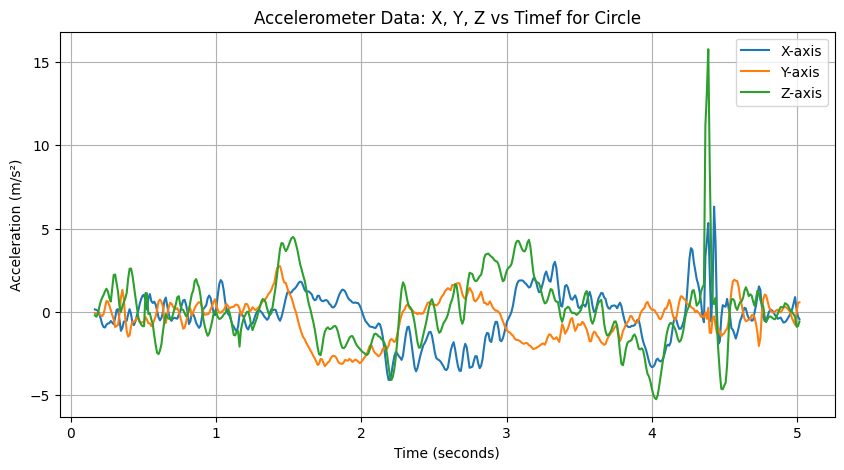

In [25]:
# Load the uploaded accelerometer file
file_path = "/content/lab-3-building-a-dataset-team4-main/Circle_Complete/Accelerometer (1).csv"

df = pd.read_csv(file_path)

# Plot the accelerometer readings
plt.figure(figsize=(10, 5))
plt.plot(df["seconds_elapsed"], df["x"], label="X-axis")
plt.plot(df["seconds_elapsed"], df["y"], label="Y-axis")
plt.plot(df["seconds_elapsed"], df["z"], label="Z-axis")
plt.xlabel("Time (seconds)")
plt.ylabel("Acceleration (m/s²)")
plt.title("Accelerometer Data: X, Y, Z vs Timef for Circle")
plt.legend()
plt.grid(True)
plt.show()